In [5]:
pip install squarify

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [7]:
df = pd.read_csv("20250707_ODOP_Products_V31.csv", encoding="latin1")

In [8]:
df["Category"] = df["Category"].str.strip().str.title()
df["Sector"] = df["Sector"].str.strip().str.title()
df["GI Status"] = df["GI Status"].str.strip().str.title()
df["State"] = df["State"].str.strip()

df["GI Status"] = df["GI Status"].replace({
    "Y": "Yes", "N": "No", "Yes": "Yes", "No": "No"
})


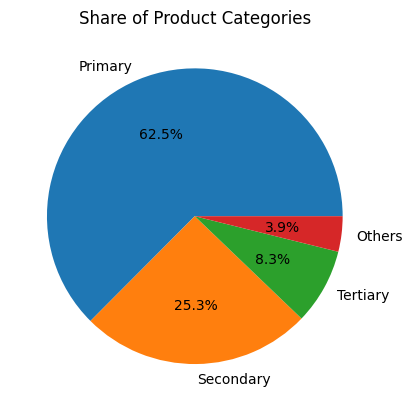

In [9]:
plt.figure()
df["Category"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Share of Product Categories")
plt.ylabel("")
plt.show()

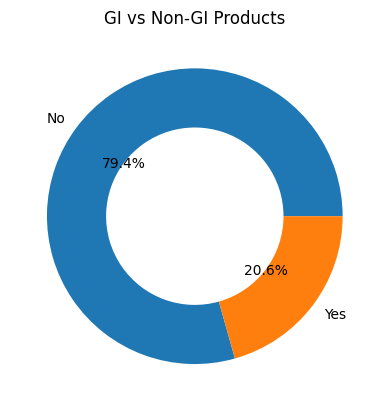

In [10]:
plt.figure()
counts = df["GI Status"].value_counts()
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", wedgeprops=dict(width=0.4))
plt.title("GI vs Non-GI Products")
plt.show()

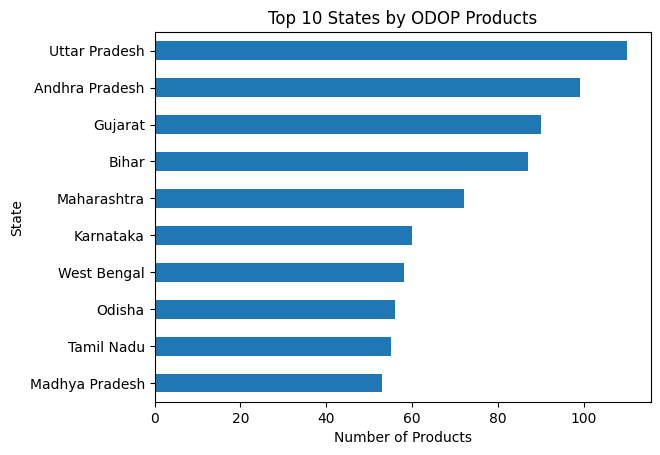

In [11]:
plt.figure()
df["State"].value_counts().head(10).sort_values().plot(kind="barh")
plt.title("Top 10 States by ODOP Products")
plt.xlabel("Number of Products")
plt.show()


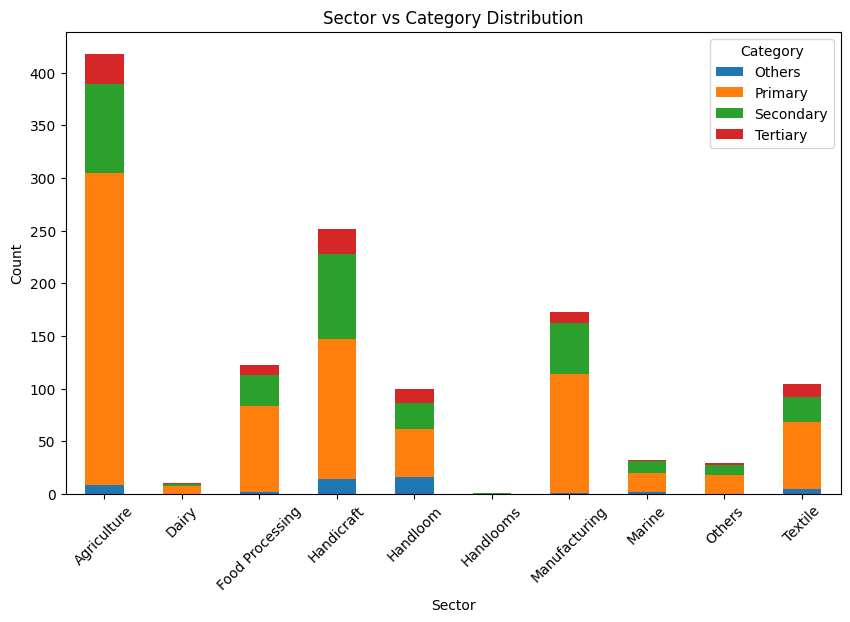

In [12]:
cross = pd.crosstab(df["Sector"], df["Category"])
cross.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Sector vs Category Distribution")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


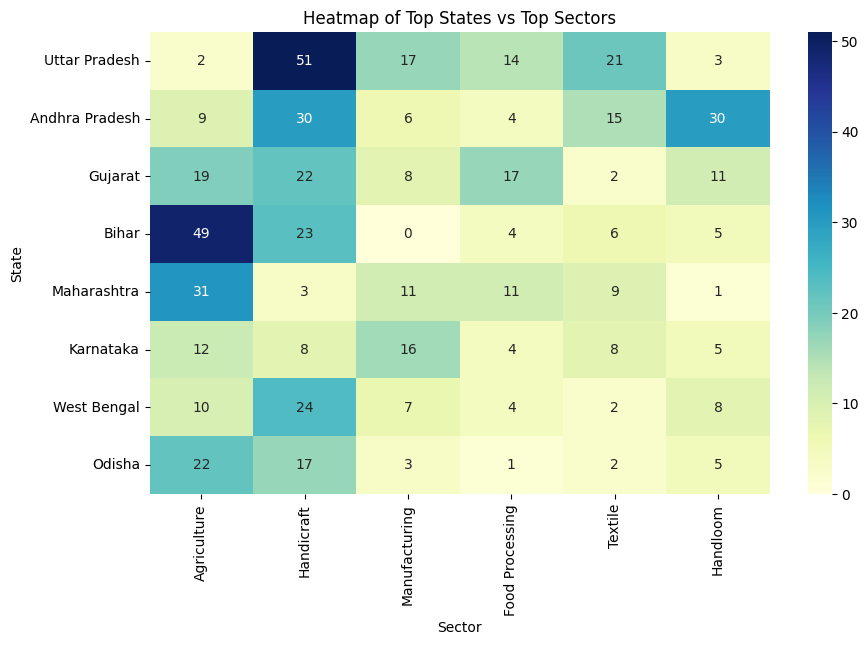

In [13]:
top_states = df["State"].value_counts().head(8).index
top_sectors = df["Sector"].value_counts().head(6).index

heat_data = pd.crosstab(df["State"], df["Sector"]).loc[top_states, top_sectors]

plt.figure(figsize=(10,6))
sns.heatmap(heat_data, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap of Top States vs Top Sectors")
plt.show()

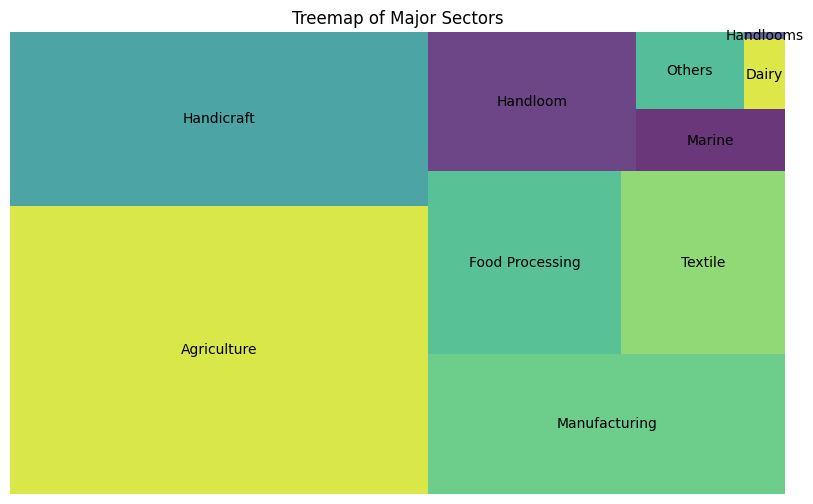

In [14]:
sector_counts = df["Sector"].value_counts().head(10)
plt.figure(figsize=(10,6))
squarify.plot(sizes=sector_counts.values, label=sector_counts.index, alpha=0.8)
plt.title("Treemap of Major Sectors")
plt.axis("off")
plt.show()

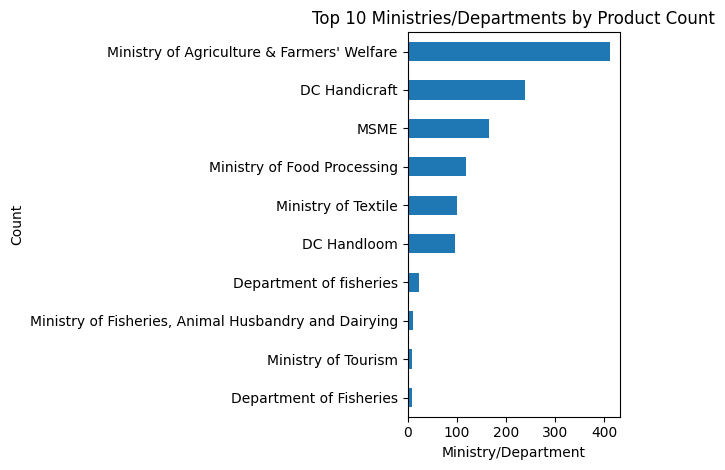

In [24]:
plt.figure()
df["Ministry/ Department"].value_counts().head(10).sort_values().plot(kind="barh")
plt.title("Top 10 Ministries/Departments by Product Count")
plt.xlabel("Ministry/Department")
plt.ylabel("Count")
plt.xticks()
plt.tight_layout()
plt.show()

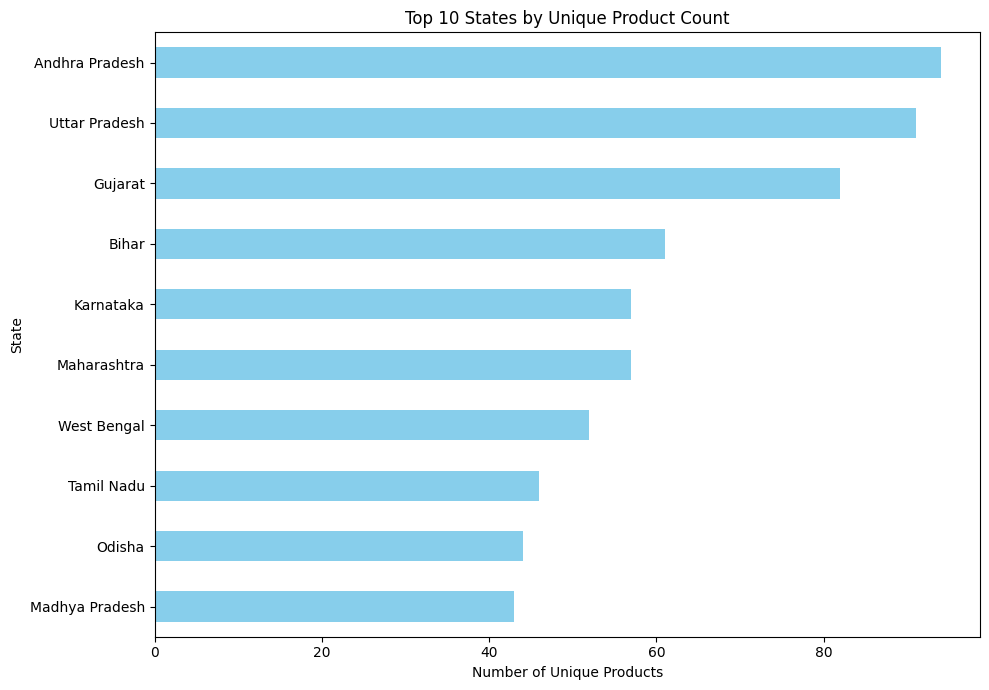

In [26]:
unique_products_per_state = df.groupby('State')['Product'].nunique().sort_values(ascending=False)
top_10_unique_products = unique_products_per_state.head(10)

plt.figure(figsize=(10, 7))
top_10_unique_products.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 States by Unique Product Count')
plt.xlabel('Number of Unique Products')
plt.ylabel('State')
plt.tight_layout()
plt.show()

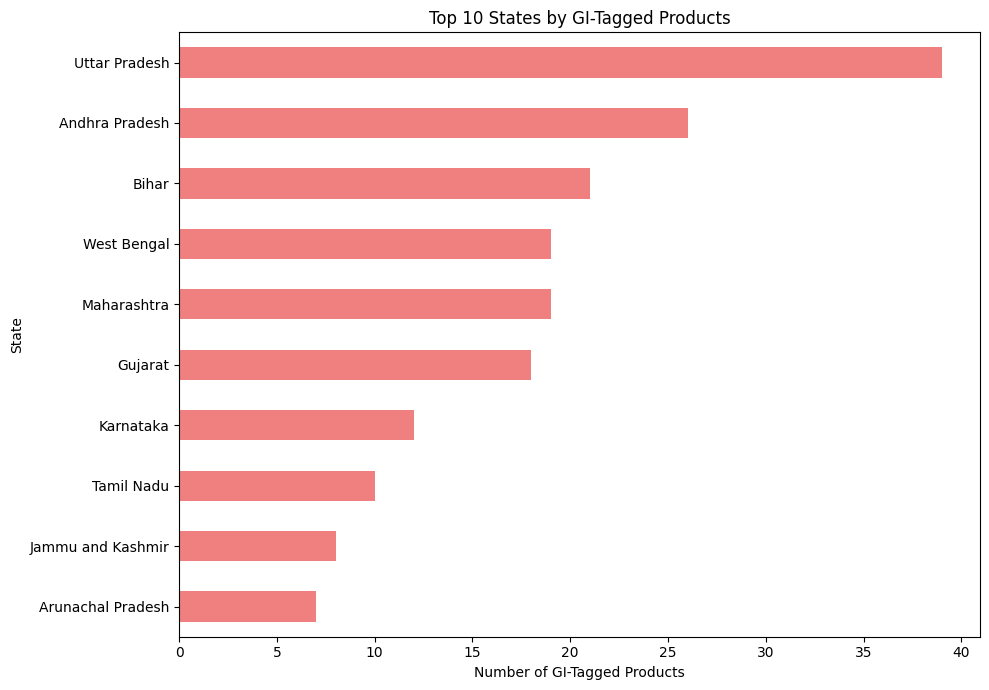

In [27]:
gi_df = df[df['GI Status'] == 'Yes']
gi_products_per_state = gi_df.groupby('State')['Product'].count().sort_values(ascending=False)
top_10_gi_states = gi_products_per_state.head(10)

plt.figure(figsize=(10, 7))
top_10_gi_states.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Top 10 States by GI-Tagged Products')
plt.xlabel('Number of GI-Tagged Products')
plt.ylabel('State')
plt.tight_layout()
plt.show()